In [1]:
import warnings
warnings.filterwarnings('ignore')

# Load NeuroKit and other useful packages
import neurokit2 as nk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 6]  # Bigger images

#nk.cite()

## Simulate artificial physiological signals
https://neurokit2.readthedocs.io/en/latest/examples/simulation.html#Cardiac-Activity-(ECG)

In [34]:
n = 3#5 #dyads

fd = {}
md = {}
for i in n:
    fd[o] = nk.ecg_simulate(duration=300, sampling_rate=1000, noise=0.0, heart_rate=65) # Alternate heart rate and noise levels
    md[i] = nk.ecg_simulate(duration=300, sampling_rate=1000, noise=0.0, heart_rate=65)
    
# Visualize
ecg_df = pd.DataFrame({"Female": fd01,
                       "Male": md01})

nk.signal_plot(ecg_df[:30000], subplots=True)

TypeError: 'int' object is not iterable

## Process the signals
https://neurokit2.readthedocs.io/en/latest/examples/intervalrelated.html#Process-the-Signals

"Note: Do remember to specify the correct sampling_rate [...] in which the signals were generated, in all the relevant functions."

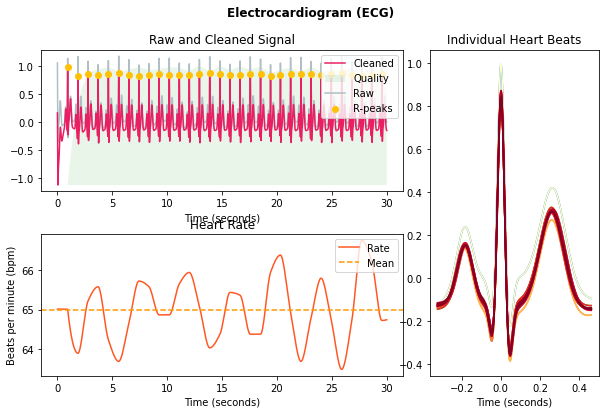

In [3]:
# Default processing pipeline
signals, info = nk.ecg_process(fd01, sampling_rate=1000)

# Visualize
plot = nk.ecg_plot(signals[:30000], sampling_rate=1000)
#plot = nk.ecg_plot(signals[:30000])

In [25]:
nk.ecg_intervalrelated(signals, sampling_rate=1000)

,ECG_Rate_Mean,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,...,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSE,HRV_CMSE,HRV_RCMSE,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
0,65.012696,922.925926,13.553725,0.358997,13.54723,NaN,NaN,NaN,NaN,15.098131,...,2.041414,5.609016,1.620131,1.102604,0.443026,0.432781,1.673091,2.024851,4.124579,0.797949


## Extract R-peaks location
https://neurokit2.readthedocs.io/en/latest/examples/heartbeats.html#Extract-R-peaks-location

325

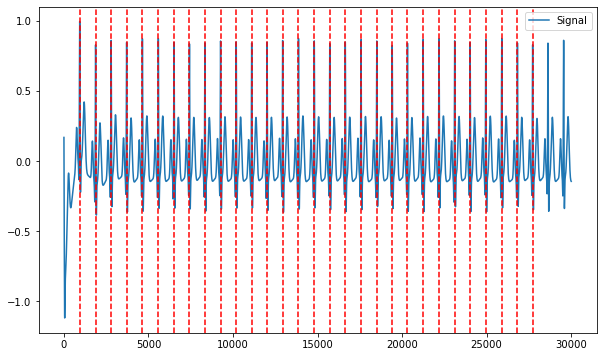

In [31]:
# Extract clean ECG and R-peaks location
rpeaks = info["ECG_R_Peaks"]
cleaned_ecg = signals["ECG_Clean"]
# Visualize R-peaks in ECG signal
plot = nk.events_plot(rpeaks[:30], cleaned_ecg[:30*1000])
len(rpeaks)

## Segment the signal around the heart beats
https://neurokit2.readthedocs.io/en/latest/examples/heartbeats.html#Segment-the-signal-around-the-heart-beats

The length of the dictionary is 325


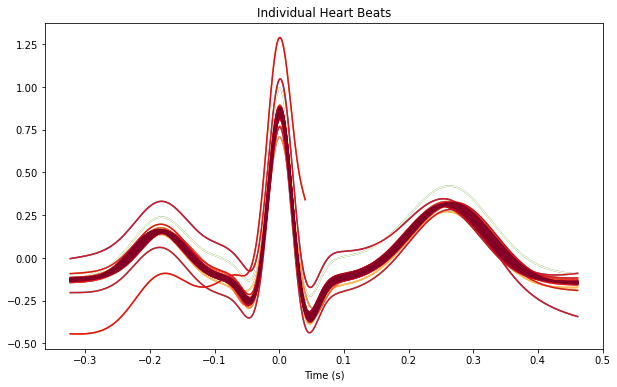

In [21]:
# Plotting all the heart beats
epochs = nk.ecg_segment(cleaned_ecg, rpeaks=None, sampling_rate=1000, show=True)
#This create a dictionary of dataframes for each ‘epoch’ (in this case, each heart beat).
print("The length of the dictionary is {}.".format(len(epochs)))